# Introducción y principios de las redes neuronales convolucionales


Para las etapas de convolución son importantes tres cosas:

1. El $\textbf{padding}$

Que consiste en 'rellenar' la imagen para que el filtro pueda analizar de buena manera su contorno sin perder información.


2. el $\textbf{stride}$

Que es simplemente cuántas casillas avanza el kernel en cada movimiento 


3. la $\textbf{convolución}$

Resulta al hacer el mapeo del kernel sobre todo la imagen de entrada

Dada una matriz $M_{nm}$ y un kernel de tamaño $k$, las dimensiones de la matriz resultante de aplicar el kernel a M serán:
$$m'=\frac{m-k+p}{s}+1$$
$$n'=\frac{n-k+p}{s}+1$$

donde $p$ es el tamaño del padding (por ahora cero), y $s$ es el tamaño del stride

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def relu(x):
    return x * (x > 0)

def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

In [2]:
#definimos la convolución como 
def conv(M,K,stride):
    #n2=int((len(M)-len(K))/stride +1) #filas del mapeo
    n2=int((np.shape(M)[0]-np.shape(K)[0])/stride + 1)
    #m2=int((len(M[0])-len(K))/stride +1) #columnas del mapeo
    m2=int((np.shape(M)[1]-np.shape(K)[1])/stride + 1)
    k=len(K)
    M2=np.zeros((n2,m2))
    
    for i in range(n2):
        for j in range(m2):
            M2[i,j] = np.sum(M[i:i+k,j:j+k] * K)
    return M2
    
    
    

<AxesSubplot:>

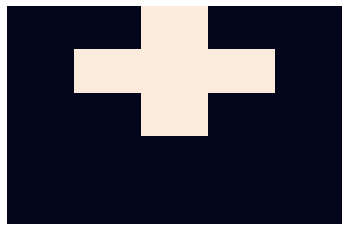

In [39]:
#ejemplo, una imagen de 3x3
#I=np.arange(1,10)
#I=I.reshape((3,3))
I=np.array([[0,0,1,0,0],
            [0,1,1,1,0],
            [0,0,1,0,0],
            [0,0,0,0,0],
            [0,0,0,0,0]])
sb.heatmap(I,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

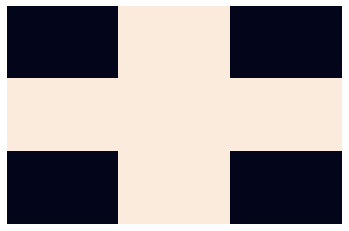

In [40]:
#un filtro de 2x2
K=np.array([[0,1,0],
            [1,1,1],
            [0,1,0]])
sb.heatmap(K,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

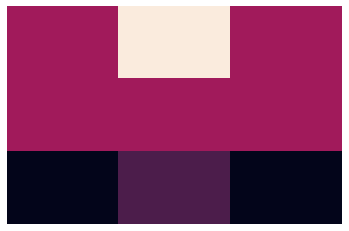

In [41]:
#Hacemos la convolución con stride=1
c=conv(I,K,1)
sb.heatmap(c,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

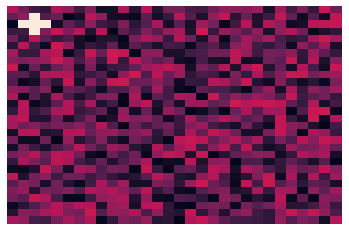

In [56]:
#más grande
I=np.random.random((30,30))
I[2,1:4]=2
I[1:4,2]=2
sb.heatmap(I,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

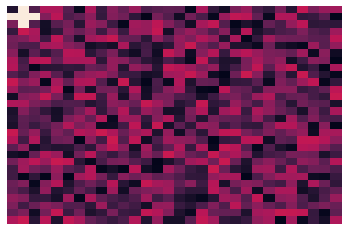

In [54]:
I=np.random.random((30,30))
I[1,0:3]=2
I[0:3,1]=2
sb.heatmap(I,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

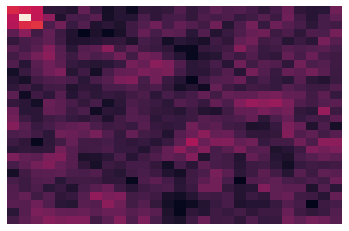

In [61]:
c=conv(I,K,1)
sb.heatmap(c,cbar=False,yticklabels=False,xticklabels=False)

<AxesSubplot:>

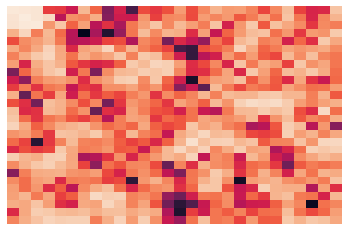

In [65]:
c=conv(I,K,1)
c=sigmoid(c)
sb.heatmap(c,cbar=False,yticklabels=False,xticklabels=False)

### Pooling o agrupamiento
Se trata del proceso en el que reducimos la dimensión de la figura. Se hace al pasar una ventana sobre la figura y aplicando alguna función. Por ejemplo: asignar a esa ventana la media o el valor máximo.

Tomamos de nuevo a I, y pasamos a través de él una ventana de dimensiones $k_1$ x $k_2$. Las dimensiones resultantes son las mismas que en si se estuviera aplicando una convolución.

In [66]:
def pooling(X,k1,k2):
    n2=int(np.shape(X)[0]-k1 + 1)
    #m2=int((len(M[0])-len(K))/stride +1) #columnas del mapeo
    m2=int(np.shape(X)[1]-k2 + 1)
    M2=np.zeros((n2,m2))
    
    for i in range(n2):
        for j in range(m2):
            M2[i,j] = 1/(k1*k2)*np.sum(X[i:i+k1,j:j+k2])
    return M2
    

<AxesSubplot:>

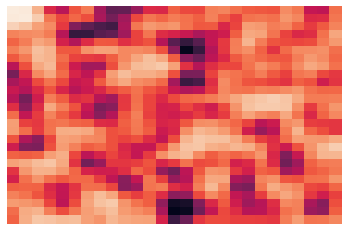

In [68]:
p=pooling(c,2,2)
sb.heatmap(p,cbar=False,yticklabels=False,xticklabels=False)

In [19]:
I

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
pooling(I,2,2)

array([[3., 4.],
       [6., 7.]])

# Convolución de un lote de imágenes 
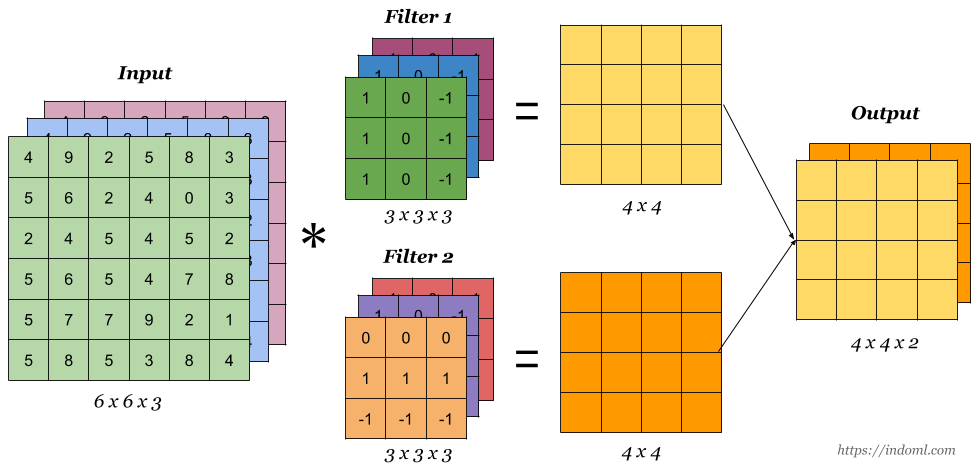

Cuando hacemos la convolución de un lote de imágenes, a cada imagen le corresponde un kernel particular. Cada kernel recorre la imagen de igual manera.(es decir que recorren las imágenes al mismo tiempo).

Añadido a esto, podríamos aplicar más de un filtro a la vez, (o lote de filtros mejor dicho) lo que nos generará como salida un lote de imágenes nuevas

In [3]:
#por ejemplo este es un lote de 3 imágenes de tamaño 5*5
#(imagenes,filas,columnas)

I=np.random.rand(3,5,5)
I

array([[[0.95475577, 0.83550548, 0.86030088, 0.6585898 , 0.48542593],
        [0.49028739, 0.08442068, 0.74959021, 0.7606863 , 0.16734063],
        [0.22563262, 0.97330508, 0.70170929, 0.57599969, 0.7881301 ],
        [0.32723914, 0.96314512, 0.27031018, 0.05686699, 0.13694277],
        [0.54969154, 0.44151635, 0.42815716, 0.73702083, 0.76916234]],

       [[0.8011873 , 0.18381339, 0.85344298, 0.97660003, 0.82810751],
        [0.30130464, 0.79059089, 0.99736556, 0.55442191, 0.95886616],
        [0.96433615, 0.26978443, 0.31555562, 0.23319262, 0.87819296],
        [0.24214508, 0.25681137, 0.09868966, 0.16627284, 0.62832714],
        [0.29534969, 0.88294668, 0.05063997, 0.09639304, 0.69010341]],

       [[0.28837971, 0.39233849, 0.26215331, 0.04116071, 0.04465247],
        [0.0491789 , 0.55419317, 0.34307733, 0.01985895, 0.13177301],
        [0.42623073, 0.29310161, 0.029313  , 0.31593681, 0.82496482],
        [0.18805958, 0.59150493, 0.92530726, 0.84778912, 0.61756983],
        [0.57083

In [4]:
#El lote de filtros se define de igual manera, debe ser igual al número de imágenes, pero puede haber un número
#cualquiera de estos lotes

#(lotes, filtros=número de imágenes, k1, k2)
K=np.random.rand(6,3,3,3)
K
#por ejemplo este es una capa con 6 lotes de filtros, cada lote se puede aplicar a las imágenes generando una salida.

array([[[[0.51637814, 0.41100024, 0.5576977 ],
         [0.36251486, 0.55742777, 0.15199144],
         [0.71615588, 0.53077797, 0.18905366]],

        [[0.6591364 , 0.30418856, 0.62817302],
         [0.11570571, 0.75714088, 0.62255678],
         [0.36163008, 0.10817482, 0.48597034]],

        [[0.35919253, 0.84724722, 0.8971727 ],
         [0.13350637, 0.42664763, 0.17145986],
         [0.29589717, 0.98029844, 0.05919248]]],


       [[[0.63772289, 0.20753089, 0.54704033],
         [0.87436034, 0.3657975 , 0.84609667],
         [0.09466009, 0.40585775, 0.29500351]],

        [[0.00173267, 0.65390885, 0.32274513],
         [0.04329263, 0.86979005, 0.52440697],
         [0.53699358, 0.91916984, 0.24667551]],

        [[0.97307539, 0.43574947, 0.58076176],
         [0.15737743, 0.88348461, 0.02855499],
         [0.87290283, 0.62569551, 0.00688978]]],


       [[[0.82599989, 0.1660975 , 0.39549121],
         [0.11923962, 0.30370101, 0.24337557],
         [0.54106492, 0.14669848, 0.84156346

Ahora aplicamos este lote de filtros a cada lote de imágenes, que sería la convolución entre estos dos arreglos.

I*K

Para eso vamos a implificar la función $\textbf{conv}$, para que pueda aplicar un kernel con varios filtros a un lote de imágenes.


In [5]:
#para cuando tenemos imágenes en 3 canales

def convolution(M,K,stride):
    m2=int((np.shape(M)[1]-np.shape(K)[1])/stride + 1)#filas del lote de imágenes
    n2=int((np.shape(M)[2]-np.shape(K)[2])/stride + 1)#columnas del lote de imágenes
    num_imagenes=np.shape(M)[0] #número de canales o de imágenes
    
    k1=np.shape(K)[2]#filas de cada filtro
    k2=np.shape(K)[3]#columnas de cada filtro
    k=np.shape(K)[1]#número de filtros por lote = número de imágenes
    num_ker=np.shape(K)[0] #cuántos lotes habrá por capa.
    
    M2=np.zeros((num_ker,m2,n2)) #dimensiones del lote de imágenes que generará esta convolución
    
    for l in range(num_ker):
        for i in range(m2):
            for j in range(n2):
                a=0
                for r in range(num_imagenes):
                    a=a+np.sum(M[r,i:i+k1,j:j+k2] * K[l])
                M2[l,i,j] = a
    return M2
    

In [6]:
convolution(I,K,stride=1)

array([[[19.91504561, 19.15297756, 18.36250695],
        [17.45459314, 17.4366534 , 17.39728196],
        [16.90290045, 15.18712335, 17.19776217]],

       [[20.8528407 , 20.0742269 , 19.30267413],
        [18.08169023, 18.23334503, 18.71652457],
        [18.12291023, 16.32102508, 17.3315193 ]],

       [[19.95690667, 17.81203992, 20.10369052],
        [16.80270924, 16.70956073, 18.77895473],
        [16.17964848, 15.82679946, 17.51208709]],

       [[20.87549975, 21.27677745, 23.96060318],
        [18.56181968, 20.95929996, 20.49720769],
        [17.39279648, 19.08264306, 18.63567192]],

       [[21.96597626, 20.89962016, 22.3512756 ],
        [19.49149821, 19.31310594, 20.88937975],
        [18.50141119, 17.47378652, 19.24048048]],

       [[21.05718042, 21.38663371, 22.87317932],
        [19.96731425, 20.05655593, 20.10742957],
        [18.26170283, 18.37796618, 19.19552728]]])

# Funciones de activación para los tensores

In [2]:
# RELU
def relu(x):
    return x * (x > 0)

def drelu(x):
    return 1. * (x > 0)

#IDENTIDAD
def iden(X):
    return X
def diden(X):
    return 1

#SIGMOIDE
def sigmoid(X):
    return 1/(1+np.exp(-X))
def dsigmoid(X):
    return sigmoid(X)*(1-sigmoid(X))

#TANGENTE HIPORBÓLICA
def tanh(X):
    return np.tanh(X)
def dtanh(X):
    return 1-tanh(X)**2

In [3]:
import matplotlib.pyplot as plt

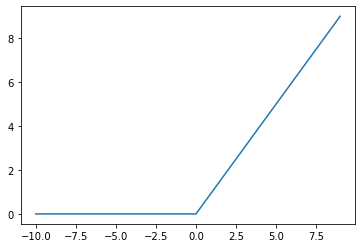

In [4]:
x=np.arange(-10,10)
plt.plot(x,relu(x))